## Investigating the oversmoothing issues in GNNs
* Use the karate club network data
* Use GCN model from pytorch-geometric
* Change the number of layers to be between L = [1,2,4,8,16,...,1024]
* Report the final accuracy for each L
* Visualize the trends by plotting L vs Acc.

In [ ]:
import networkx as nx
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load the Karate Club graph
G = nx.karate_club_graph()
edge_index = torch.tensor(list(G.edges)).t().contiguous()

# Generate node features (one-hot encoding of node indices)
num_nodes = G.number_of_nodes()
x = torch.eye(num_nodes)

# Generate ground truth labels (0 for instructor, 1 for club president)
y = torch.tensor([1 if G.nodes[i]['club'] == 'Mr. Hi' else 0 for i in range(num_nodes)])

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)


In [ ]:
# Define a simple Graph Neural Network model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(GNNModel, self).__init__()
        self.conv_layers = nn.ModuleList([
            GCNConv(input_dim, hidden_dim),
            *[GCNConv(hidden_dim, hidden_dim) for _ in range(num_layers - 1)],
        ])
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        for conv_layer in self.conv_layers:
            x = conv_layer(x, edge_index)

        x = self.linear(x)
        return x

# Train the GNN and observe oversmoothing
def train_model(model, data, num_epochs, learning_rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')
    return output

In [ ]:
# Use the functions above to test oversmoothing
# Train the GNN
input_dim = num_nodes
hidden_dim = 16
output_dim = 3  # Three communities
num_layers = 2**(np.arange(11))
num_epochs = 20
learning_rate = 5e-3
acc_all = []

for l in num_layers:
    model = #
    output = #
    predicted = output.max(1)[1]
    acc = sum(predicted == y)/len(y)
    acc_all.append(acc)
    print('Num. of layers: %d, Acc: %.2f'%(l,acc))



In [ ]:
# Visualize the results
plt.plot(num_layers,acc_all)
plt.xlabel('Num. of layers')
plt.ylabel('Acc.')

## Dimensionality reduction without GNNs
* Create simple features from node features (mean over node features, mean over position features etc..)
* Plot them and color them using labels
* See if you can come up with better features

In [8]:
import torch
import matplotlib.pyplot as plt

In [4]:
train_set = torch.load('Data/CHILI-Challenge/train.pt')

In [6]:
train_set[0]

Data(
  x=[1433, 4],
  edge_index=[2, 10652],
  edge_attr=[10652],
  y={
    crystal_type='Spinel',
    crystal_type_number=9,
  },
  pos_frac=[1433, 3],
  pos_abs=[1433, 3],
  id='data_1'
)

In [11]:
feature_1 = #
feature_2 = #
labels = #

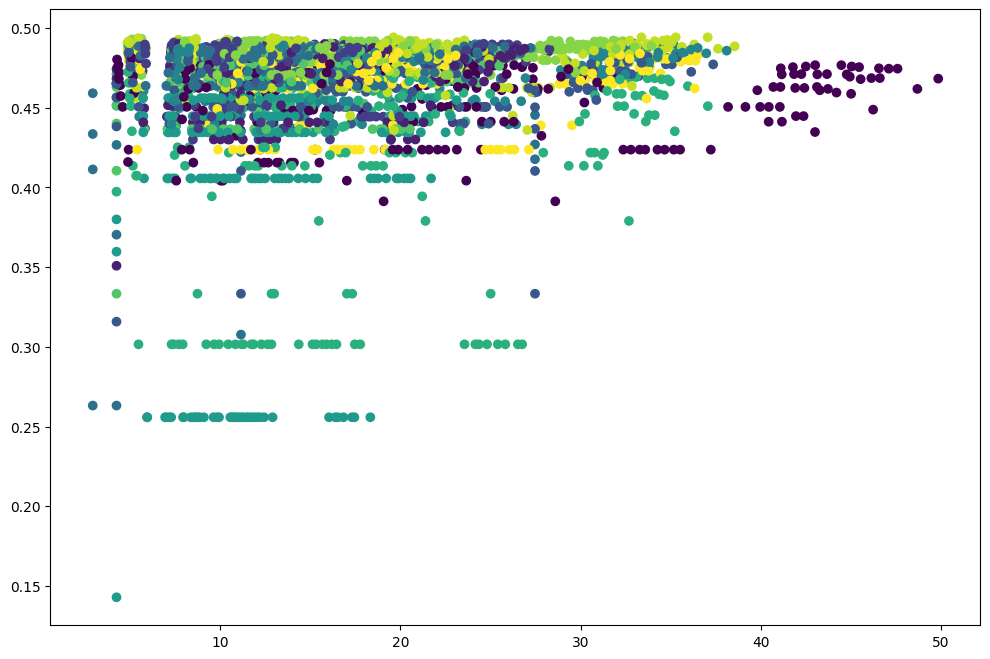

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(feature_1,feature_2,c=labels)